In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
print(len(train_labels))
print(len(test_labels))

60000
10000


### Pre-process and visualization

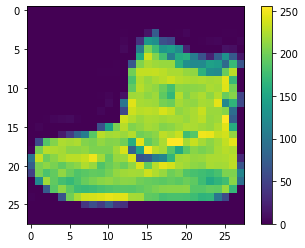

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
# Scale pixel values to a range of 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0

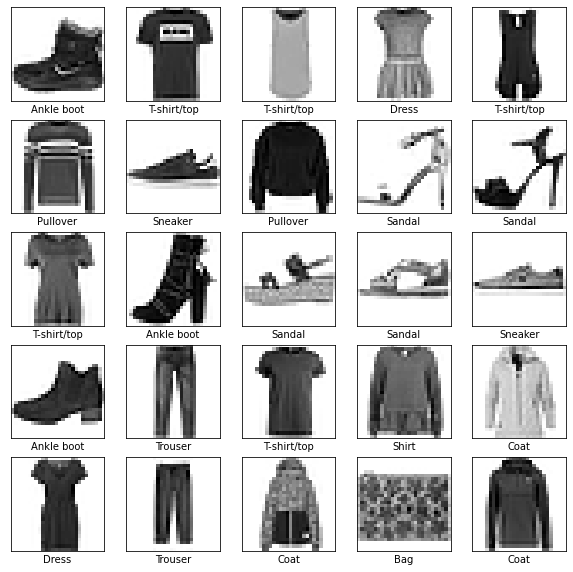

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Build the model


1.   Setup the layers
2.   Compile the model



In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Train the model


1.   Feed the model
2.   Evaluate
3.   Verify Prediction



In [10]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 2ms/step - loss: 0.4924 - accuracy: 0.8239
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3645 - accuracy: 0.8660
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3292 - accuracy: 0.8789
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3093 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2901 - accuracy: 0.8923
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2764 - accuracy: 0.8973
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2646 - accuracy: 0.9002
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2544 - accuracy: 0.9040
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2437 - accuracy: 0.9085
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.235

### Test accuracy

In [11]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('Test accuracy:', test_acc)

313/313 - 1s - loss: 0.3573 - accuracy: 0.8821 - 678ms/epoch - 2ms/step
Test accuracy: 0.882099986076355


### Confusion matrix

In [22]:
predictions = model.predict(test_images)
matrix = confusion_matrix(test_labels, predictions.argmax(axis=1))
print("Confusion matrix:")
print(matrix)

Confusion matrix:
[[795   2  10  25   3   2 160   0   3   0]
 [  1 972   1  17   4   0   4   0   1   0]
 [ 23   1 851  12  57   0  55   0   1   0]
 [  9  11   9 893  28   1  45   0   4   0]
 [  3   1 138  39 749   0  68   0   2   0]
 [  0   0   0   0   0 944   0  21   1  34]
 [ 86   0  97  25  54   0 727   0  11   0]
 [  0   0   0   0   0  13   0 947   0  40]
 [  5   0   5   5   1   6   4   3 971   0]
 [  0   0   0   0   0   4   1  23   0 972]]


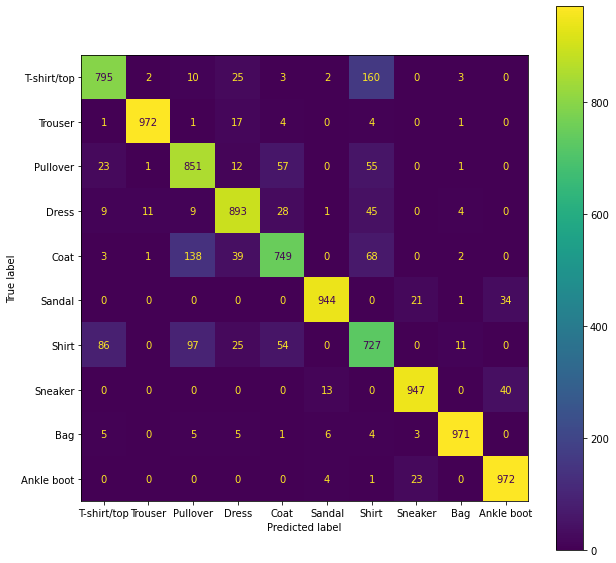

In [21]:
cmp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=class_names)
fig, ax = plt.subplots(figsize=(10,10))
cmp.plot(ax=ax)

plt.show()